

# Project: wrangling & analyzing data of twitter account WeRateDogs.
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Dogs are mostly the best friends and sometime provide lough and enjoyment into our lifes. If anyone want to get new dog this is one of the best places to get an idea about dogs in general.  

These datasets which contains information about 5,000 dogs collected from  tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.Also,WeRateDogs has over 4 million followers and has received international media coverage.

The datasetes contians information about the following data (tweet ID, timestamp, text,image pridictions , favorite_count and retweet_count)



In [268]:
#import the libraries we gonna use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for accessing the image prediction file that listed online.
import requests
# the twitter API
import tweepy 
from tweepy import OAuthHandler
import json
import os
import csv
import time
from timeit import default_timer as timer


<a id='gather'></a>
## 1.Gathering
we gather 3 pieces of data as described below:

2.1. The WeRateDogs Twitter archive: This file was given by Udacity directly in the downloadable format through this link

2.2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.It was downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

2.3. Using the tweet IDs in the WeRateDogs Twitter archive, we query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data was written to its own line. Then we read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.


### 1.1: Loading the WeRateDogs Twitter archive.CSV file .



In [269]:
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

### 1.2 : downloading & loading image-predictions.TSV file from URL.

In [270]:
folder_name = 'image-predictions'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [271]:

with open (os.path.join(folder_name,url. split('/')[-1]), mode='wb') as file:
        file.write(response.content)
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [272]:
img_predict = pd.read_csv('image-predictions.tsv',sep = '\t')


### 1.3 : Using twitter API to generate txt file & reading tweet_json.txt file.

In [7]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [9]:


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [273]:
# selecting our columns from json txt file to store in dataframe
columns = ['id', 'favorite_count', 'retweet_count']
# creating list to be converted to dataframe
data = []

with open('tweet-json.txt', 'r') as tweetfile: 
    # Read JSON line and convert to dict
    reading_json =  tweetfile.readline()
    
    # Reading lines by line into DataFrame
    while reading_json:
        tweet_dict = json.loads(reading_json)
        # Creating a smaller dict
        row = dict((a, tweet_dict[a]) for a in columns)
        data.append(row)
        
        # Reading JSON line and convert to dict
        reading_json = tweetfile.readline()
        
            
    
twit_json = pd.DataFrame.from_dict(data)

<a id='assess'></a>
## 2.Assessing
* we will assess the three datasets that we gathered using two methods :
2.1. visual assessment. 
2.2. programmatical assessment. 


* we searched for two kind of issues :
   * quality issues (8 issues ): Issues with the content. Low quality data is also known as dirty data, such as missing values.
   * tidiness issues (3 issues): Issues with the structure that prevent easy analysis. Untidy data is also known as messy data.

* as per Udacity Tidy data requirements:

     * Each variable forms a column.
     * Each observation forms a row.
     * Each type of observational unit forms a table.


we will gather all issues at the end of assessing to make it easy for cleaning and reviewing .


### 2.1 visual assessment.
Scrolling throw data and looking for quality and tidiness issues by eye . 

note : It is easy however due to big data & jupyter crashing lines , it is better to use excel or note programs to access full lines.   

In [274]:
# having a look at the first few lines of twitter-archive-enhanced
twit_arch 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [275]:
# having a look at the first few lines of image prediction.
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [276]:
# having a look at the first few lines of tweet-json
twit_json


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


#### 2.1.1 notes from visual assessment : 
* coulums with too much missing values. (in_reply_to_status_id,in_reply_to_user_id ,retweeted_status_user_id,retweeted_status_timestamp).
* some 'name' is only 'a' and some none ( will be searched more using pgromatical assessing )
* p1 , p2 , p3 have sometime lower-case letters and some otherwise .
* rating_numerator not always greater than 10 ( will be searched more using pgromatical assessing )
* rating_denominator not always 10 ( will be searched more using pgromatical assessing )

## 2.2. programmatical assessment.

Assessing using codes 

### 2.2.1 general information.

In [277]:
# getting information from the twitter-archive-enhanced
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [278]:
# getting infromation from the image prediction.

img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [279]:
# getting infromation from the tweet-json

twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### notes from general information. :
* erronous datatypes : timestamp should be datetime.
* columns (doggo , floofer , pupper , puppo ) should inculde NaN values ?! ; ok , that beacuse its writen None .
* expanded_urls have some missing values.


### 2.2.2 general describitons ( for numbers) .

In [280]:
# getting genreal idea about the twitter-archive-enhanced
twit_arch.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [281]:
# getting genreal idea about the image prediction.
img_predict.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [282]:
# getting genreal idea about the tweet-json.

twit_json.describe()


,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### notes from general describitons
* rating_denominator have other numbers than 10  such as 0 and 170
* rating_numerator have a mean of 13 but clear outliers such 0 and 1776

### 2.2.3 Checking for duplicated rows


In [283]:
# Checking for duplicated rows twitter-archive-enhanced
sum(twit_arch.duplicated())


0

In [284]:
# Checking for duplicated rows image prediction.
sum(img_predict.duplicated())


0

In [285]:
# Checking for duplicated rows tweet json
sum(twit_json.duplicated())


0

### notes from checking for duplicated rows
no duplicated rows

### 2.2.3 Checking for uniquenees


In [286]:
# Checking for uniquenees twitter-archive-enhanced
twit_arch.nunique()


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [287]:
# Checking for uniquenees image prediction.
img_predict.nunique()


tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [288]:
# Checking for uniquenees tweet-json
twit_json.nunique()


id                2354
favorite_count    2007
retweet_count     1724
dtype: int64

### Note from checking for uniquenees
* no duplicated tweet_id 
* only 957 unique name. 
* only 2009 unique out of 2075 jpg_url.(duplicated)


### 2.2.4 Investigate some columns

In [289]:

twit_arch[twit_arch['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


#### note :
most missing expanded_urls are retweets

In [290]:
# showing values of rating_numerator
twit_arch.rating_numerator.sort_values()     

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [291]:
# showing count of each value of rating_numerator
twit_arch.rating_numerator.value_counts()      

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [292]:
# showing values of rating_denominator

twit_arch.rating_denominator.sort_values()     

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [293]:
# showing count of each value of rating_denominator
twit_arch.rating_denominator.value_counts()     

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [294]:
# showing count of each value of name 
twit_arch.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Tug            1
Eleanor        1
Sojourner      1
Izzy           1
Linus          1
Name: name, Length: 957, dtype: int64

In [295]:
# showing count of each value of source 

twit_arch.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## 3.1 missing values issues
1. Coulums with too much missing values. (in_reply_to_status_id,	in_reply_to_user_id	,retweeted_status_user_id,retweeted_status_timestamp).
2. missing value  for expanded_urls.

## 3.2 Tidiness issues 
1. The four columns (( doggo, floofer, pupper, puppo)) should be one column ((stage )).
2. Merging all into master file ( twitter-archive-enhanced & twitter-json & image-prediction ).

## 3.3 Qulity Issues
* First column name tweet-json is (id) while others tweet_id.( will be done in tidinees 2 to be able to join tables. 

1. Retweets are not original we only care about tweets.

2. Source column is not easy to read.

3. Wrong datatypes : timestamp should be date and time & tweet_id is object(no calculation ).

4. Name : Missing names or only using letter 'a' is not really a name of a dog.(all lowercases).

5. p1,p2,p3 are columns to predcit dog ; Also p1_conf,p2_conf,p2_conf are confidence_level columns ( all same ).

6. Some images are not an image of dogs .

7. Unsable coulums ('p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf','p3_dog')  (after qulity 5).

8. Some rating_denominator & rating numerator values are correct at text wrong in their columns.

9. All rating_denominator should be 10.

10. Rating numerator have many vlues less than 10 & some ouliers like 1776.

<a id='clean'></a>
## 3.cleaning
we will clean the quality and tidiness issues that we identified in the assess step using three steps (for every issue)

Define:used convert our assessments into defined cleaning tasks. 

Code: used to convert those definitions to code and run that code.

Test: used to test our dataset to check our cleaning. 





In [296]:
# copying our dataframes before any change.
twit_arch_clean = twit_arch.copy()
img_predict_clean = img_predict.copy()
twit_json_clean = twit_json.copy()

### 3.1 Missing Data.


### 3.1.1 Droping missing value  columns.

#### Define 
Droping unwanted coulums with too much missing values. (in_reply_to_status_id,	in_reply_to_user_id	,retweeted_status_user_id,retweeted_status_timestamp).

#### code

In [297]:
# dropping unwanted coulumns.
twit_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id' ,'retweeted_status_user_id','retweeted_status_timestamp'] , axis = 1, inplace = True)

#### test

In [298]:
# cheacking after drop.
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2297 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


### 3.1.2  filling missing value  for expanded_urls.


#### Define 
Filling expanded url using tweet_id beacuse if you look closely each url is as follows:
https://twitter.com/dog_rates/status/ ending with tweet_id

#### code

In [299]:
twit_arch_clean.expanded_urls = 'https://twitter.com/dog_rates/status/'+ twit_arch_clean.tweet_id.astype(str)

#### test

In [300]:
# cheacking after filling
twit_arch_clean.expanded_urls.count()

2356

## 3.2 Tidness Issues :


### 3.2.1 Joining stage column

#### Define 
joining ('doggo','floofer','pupper','puppo') columns into one column called stage .

#### code

In [301]:
# changeing None to NaN
twit_arch_clean[['doggo','floofer','pupper','puppo']]= twit_arch_clean[['doggo','floofer','pupper','puppo']].replace('None','')

In [302]:
# joining
twit_arch_clean['stage']= (twit_arch_clean['doggo'] + twit_arch_clean['floofer'] + twit_arch_clean['pupper'] + twit_arch_clean['puppo']).astype(str)

In [303]:
# droping un-needed columns after join.
twit_arch_clean.drop(['doggo','floofer','pupper','puppo'] , axis = 1, inplace = True)

#### test 


In [304]:
# cheacking after droping
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2356 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   stage                2356 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 184.2+ KB


In [305]:
# cheacking after joining
twit_arch_clean.stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

### 3.2.2 merging all dataframes 

#### Define 
merging (twit_json_clean , twit_arch_clean , img_predict_clean) into one file using tweet_id.

#### code

In [306]:
# renameing id to tweet_id 
twit_json_clean.columns = ['tweet_id','favorite_count','retweet_count']


In [307]:
# joining twitter-archive-enhanced & twitter-json 
twit_arch_clean =  pd.merge(twit_arch_clean, twit_json_clean, on='tweet_id', how='inner')

In [308]:
# joining twitter-archive-enhanced & twitter-json with image-prediction.

df_master = pd.merge(twit_arch_clean, img_predict_clean, on='tweet_id', how='inner')

In [309]:
# cheacking after joining
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2073 non-null   int64  
 1   timestamp            2073 non-null   object 
 2   source               2073 non-null   object 
 3   text                 2073 non-null   object 
 4   retweeted_status_id  79 non-null     float64
 5   expanded_urls        2073 non-null   object 
 6   rating_numerator     2073 non-null   int64  
 7   rating_denominator   2073 non-null   int64  
 8   name                 2073 non-null   object 
 9   stage                2073 non-null   object 
 10  favorite_count       2073 non-null   int64  
 11  retweet_count        2073 non-null   int64  
 12  jpg_url              2073 non-null   object 
 13  img_num              2073 non-null   int64  
 14  p1                   2073 non-null   object 
 15  p1_conf              2073 non-null   f

## 3 Quality Issues :


### 3.1 Removing retweets.


####  Define
Removing retweets becuase we only want tweets.

#### Code

In [310]:
#removeing retweets that are repeated as tweets
df_master.drop(df_master[df_master['retweeted_status_id'].notnull()==True].index, inplace=True)

#Droping un-need column 
df_master = df_master.drop(['retweeted_status_id'], axis=1)

#### Test 

In [311]:
# cheacking after removing
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   stage               1994 non-null   object 
 9   favorite_count      1994 non-null   int64  
 10  retweet_count       1994 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   int64  
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   bool   
 16  p2    

### 3.2 makeing source column more readable.


####  Define 
 Removing extra non readable text from source.

#### Code

In [312]:
# showing how many values after merging 
# note : in assessing it shows four values .
df_master.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [313]:
# replacing extra non readable text
df_master.source = df_master.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

In [314]:
# replacing extra non readable text

df_master.source = df_master.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')


In [315]:
# replacing extra non readable text

df_master.source = df_master.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')

#### Test 

In [316]:
# cheaking after replace.
df_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### 3.3 correct datatypes : timestamp,tweet_id, rating_numerator     

#### Define
correcting timestamp to datetime & tweet_id to string

#### Code

In [317]:
# slicing time zone. 
df_master['timestamp'] = df_master['timestamp'].str.slice(start=0, stop=-6)


In [318]:
# changing timestamep to datetime
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])


In [319]:
# changing tweet_id to string 
df_master['tweet_id']= df_master['tweet_id'].astype(str)

#### Test 

In [320]:
# cheaking after changing
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating_numerator    1994 non-null   int64         
 6   rating_denominator  1994 non-null   int64         
 7   name                1994 non-null   object        
 8   stage               1994 non-null   object        
 9   favorite_count      1994 non-null   int64         
 10  retweet_count       1994 non-null   int64         
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  p1                  1994 non-null   object      

### 3.4 Solving wrong names.

#### Define
changing wrong names (start with lowercases ) & None names to NaN.

#### Code

In [321]:
# function to locate lowercases names 
lowercase = []
for row in df_master['name']:
    if row[0].islower() and row not in lowercase:
        lowercase.append(row)
print(lowercase)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [322]:
# replaceing lowercase names with NaN
df_master['name'].replace(lowercase,np.nan,inplace = True)
# replaceing None with NaN
df_master['name'].replace('None',np.nan,inplace = True)

#### Test 

In [323]:
# cheaking after renaming
df_master.name.value_counts()

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
           ..
Stormy      1
DonDon      1
Carbon      1
Jersey      1
Newt        1
Name: name, Length: 913, dtype: int64

### 3.5 creating one column predict_dog & one column confidence_level.
    

#### Define
compaining (p1,p2,p3) into one column predict_dog , compaining (p1_conf,p2_conf,p2_conf) into one column confidence_level.

#### Code

In [324]:
# get first true prediction from p1,p2,p3  in predict_dog & confidence level from p1_conf,p2_conf,p2_conf  in confidence_level
predict_dog = []
confidence_level = []

#create a function to predict if we have dog and how much confidence level we have.

def predict(df_master):
    if df_master['p1_dog'] == True:
        predict_dog.append(df_master['p1'])
        confidence_level.append(df_master['p1_conf'])
    elif df_master['p2_dog'] == True:
        predict_dog.append(df_master['p2'])
        confidence_level.append(df_master['p2_conf'])
    elif df_master['p3_dog'] == True:
        predict_dog.append(df_master['p3'])
        confidence_level.append(df_master['p3_conf'])
    else:
        predict_dog.append('not_dog')
        confidence_level.append('not_dog')

df_master.apply(predict, axis=1)

#creating new columns
df_master['predict_dog'] = predict_dog
df_master['confidence_level'] = confidence_level

#### Test 

In [325]:
# cheaking after creating new columns
df_master.sample(100)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predict_dog,confidence_level
388,814530161257443328,2016-12-29 17:54:58,Twitter for iPhone,This is Alf. Someone just rubbed a balloon on his head. He's only a little pupset about it. 12/10 would pet well https://t.co/IOdgfnSE9G,https://twitter.com/dog_rates/status/814530161257443328,12,10,Alf,,9629,...,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,4.161420e-02,True,miniature_poodle,0.626913
1858,670046952931721218,2015-11-27 01:10:17,Twitter for iPhone,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,https://twitter.com/dog_rates/status/670046952931721218,11,10,Ben,,684,...,0.998335,True,beagle,0.000647,True,Brittany_spaniel,3.918660e-04,True,Blenheim_spaniel,0.998335
180,849412302885593088,2017-04-05 00:04:08,Twitter for iPhone,This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h*ckin loyal https://t.co/Uq3ChFgWA3,https://twitter.com/dog_rates/status/849412302885593088,12,10,Noosh,,17039,...,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,1.619070e-02,True,schipperke,0.907559
1621,674743008475090944,2015-12-10 00:10:43,Twitter for iPhone,This is Sophie. She just saw a spider. 10/10 don't just stand there Sophie https://t.co/VagYftZccT,https://twitter.com/dog_rates/status/674743008475090944,10,10,Sophie,,1514,...,0.583054,True,Shetland_sheepdog,0.065990,True,Greater_Swiss_Mountain_dog,6.523620e-02,True,Bernese_mountain_dog,0.583054
1691,673317986296586240,2015-12-06 01:48:12,Twitter for iPhone,Take a moment and appreciate how these two dogs fell asleep. Simply magnificent. 10/10 for both https://t.co/juX48bWpng,https://twitter.com/dog_rates/status/673317986296586240,10,10,NaN,,924,...,0.384099,True,bloodhound,0.079923,True,Rottweiler,6.859410e-02,True,miniature_pinscher,0.384099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,852553447878664193,2017-04-13 16:05:56,Twitter for iPhone,This is Jarod. He likes having his belly brushed. Tongue ejects when you hit the right spot. 13/10 downright h*ckin adorable https://t.co/ArnxkyD2kC,https://twitter.com/dog_rates/status/852553447878664193,13,10,Jarod,,17492,...,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,1.259400e-01,True,bloodhound,0.186498
1614,674788554665512960,2015-12-10 03:11:43,Twitter for iPhone,Say hello to Maggie. She's a Western Septic Downy. Pretends to be Mexican. Great hardwood flooring. 9/10 https://t.co/P3ElQ2wsjb,https://twitter.com/dog_rates/status/674788554665512960,9,10,Maggie,,871,...,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,1.342290e-01,True,miniature_poodle,0.349561
167,852311364735569921,2017-04-13 00:03:59,Twitter for iPhone,This is Wiggles. She would like you to spot her. Probably won't need your help but just in case. 13/10 powerful as h*ck https://t.co/2d370P0OEg,https://twitter.com/dog_rates/status/852311364735569921,13,10,Wiggles,,35325,...,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False,not_dog,not_dog
1433,681297372102656000,2015-12-28 02:15:26,Twitter for iPhone,This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap,https://twitter.com/dog_rates/status/681297372102656000,12,10,NaN,,3490,...,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,9.622860e-02,True,Lhasa,0.482401


### 3.6 Deleting rows with no dog image.
    

#### Define
Droping rows with not dog image prediction that was gathered in last step .

#### Code

In [326]:
df_master = df_master[df_master['predict_dog'] != 'not_dog']


#### Test 

In [327]:
# cheaking after droping
df_master.predict_dog.value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
Japanese_spaniel          1
standard_schnauzer        1
silky_terrier             1
Name: predict_dog, Length: 113, dtype: int64

### 3.7 Droping non usable columns anymore.

#### Define 
Droping unsable coulums ('p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf','p3_dog')                                                         

#### Code

In [328]:
# droping un-needed coulumns.
df_master.drop(['p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3','p3_conf','p3_dog'] , axis = 1, inplace = True)

#### Test 

In [329]:
# cheaking after droping
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1686 non-null   object        
 1   timestamp           1686 non-null   datetime64[ns]
 2   source              1686 non-null   object        
 3   text                1686 non-null   object        
 4   expanded_urls       1686 non-null   object        
 5   rating_numerator    1686 non-null   int64         
 6   rating_denominator  1686 non-null   int64         
 7   name                1187 non-null   object        
 8   stage               1686 non-null   object        
 9   favorite_count      1686 non-null   int64         
 10  retweet_count       1686 non-null   int64         
 11  jpg_url             1686 non-null   object        
 12  img_num             1686 non-null   int64         
 13  predict_dog         1686 non-null   object      

### 3.8 correcting some rating_numerator & rating_denominator .


#### Define
Replacing wrong ratings with write ones from text column. (manually)

In [330]:
#showing ratings that are rating_denominator!=10
pd.set_option('display.max_colwidth', 200)
df_master.loc[df_master.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


#### Code

In [331]:
# manuall correctiong rating_numerator & rating_denominator using index by looking at above table .
df_master.loc[876, 'rating_numerator':'rating_denominator'] = [14, 10]
df_master.loc[967, 'rating_numerator':'rating_denominator'] = [13, 10]
df_master.loc[1001, 'rating_numerator':'rating_denominator'] = [11, 10]
df_master.loc[1405, 'rating_numerator':'rating_denominator'] = [10, 10]
df_master.loc[2052, 'rating_numerator':'rating_denominator'] = [9, 10]



#### Test 

In [332]:
# cheaking after correction
df_master.rating_denominator.value_counts()

10     1674
80        2
50        2
150       1
130       1
120       1
110       1
90        1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

### 3.9 Deleting rows with rating_denominator not equal to 10
    

#### Define
Droping rows with rating_denominator not equal 10 (mostly multi-dogs) ( only 12 rows)

#### Code

In [333]:
df_master = df_master[df_master['rating_denominator'] == 10]


#### Test 

In [334]:
# cheaking after deleting
df_master.rating_denominator.value_counts()

10    1674
Name: rating_denominator, dtype: int64

In [335]:
# cheaking after deleting
df_master.rating_numerator.value_counts()

12    423
10    361
11    357
13    230
9     133
8      68
7      31
14     24
6      16
5      14
4       6
3       5
2       2
75      1
27      1
26      1
0       1
Name: rating_numerator, dtype: int64

### 3.10 removing outliers from rating_numerator

#### Define
Droping rows with rating_numerator=x (15 > x > 2) ( only 6 rows)

#### Code

In [336]:
# Droping rows rating_numerator > 2
df_master = df_master[df_master['rating_numerator'] > 2]
# Droping rows rating_numerator < 15

df_master = df_master[df_master['rating_numerator'] < 15]


#### Test 

In [337]:
# cheaking after deleting
df_master.rating_numerator.value_counts()

12    423
10    361
11    357
13    230
9     133
8      68
7      31
14     24
6      16
5      14
4       6
3       5
Name: rating_numerator, dtype: int64

## storing data 

In [338]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


<a id='eda'></a>
## Exploratory Data Analysis



In [340]:
df_master.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,predict_dog,confidence_level
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856,13,10,NaN,,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595


In [341]:
df_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 1 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1668 non-null   object        
 1   timestamp           1668 non-null   datetime64[ns]
 2   source              1668 non-null   object        
 3   text                1668 non-null   object        
 4   expanded_urls       1668 non-null   object        
 5   rating_numerator    1668 non-null   int64         
 6   rating_denominator  1668 non-null   int64         
 7   name                1182 non-null   object        
 8   stage               1668 non-null   object        
 9   favorite_count      1668 non-null   int64         
 10  retweet_count       1668 non-null   int64         
 11  jpg_url             1668 non-null   object        
 12  img_num             1668 non-null   int64         
 13  predict_dog         1668 non-null   object      

### 4.1 how did the number of tweets change over time ?


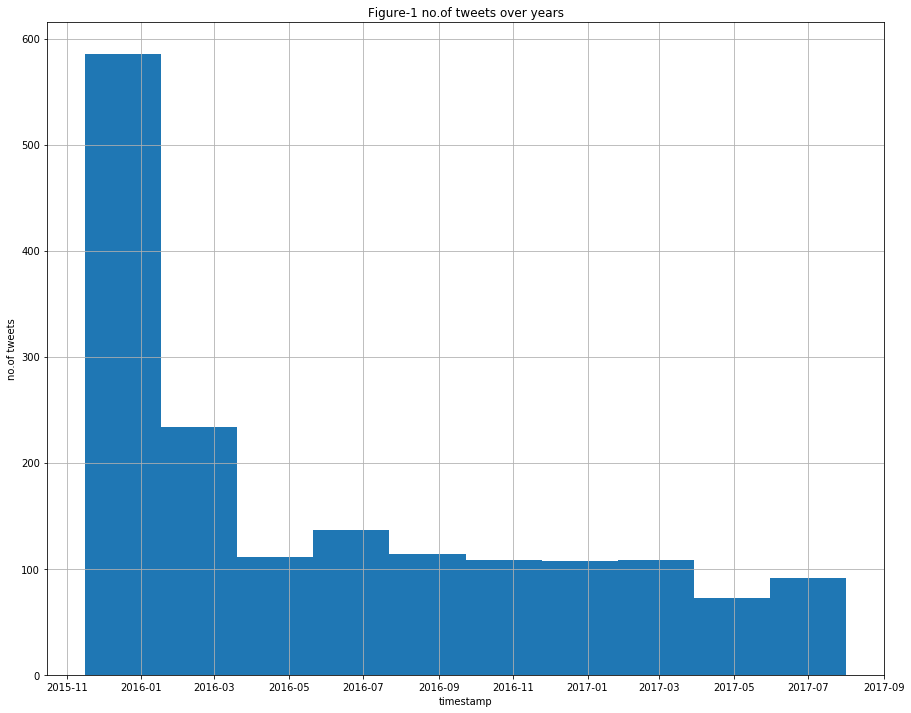

In [339]:
# to plot histogram between number of movies and year 
# x-axis label
plt.xlabel('timestamp')
# y-axis label

plt.ylabel('no.of tweets')
#title of the line plot

plt.title('Figure-1 no.of tweets over years')
#plotting the graph

df_master.timestamp.hist(figsize= (15 , 12));

#### 4.1 Discussion
Figure-1 show that it is clear that tweets are less over the years.Also to get the exact number of movies yearly we can use groupby function.

### 4.2 Which month has the most/least number of tweets ?
Here I will search for the number of tweets for each month between 2015/11 & 2017/9



In [354]:
df_master['month'] = df_master['timestamp'].dt.month

In [1]:

no_of_tweets_grouped_by_month = df_master.groupby('month').tweet_id.count()
no_of_tweets_grouped_by_month.head(12)

NameError: name 'df_master' is not defined

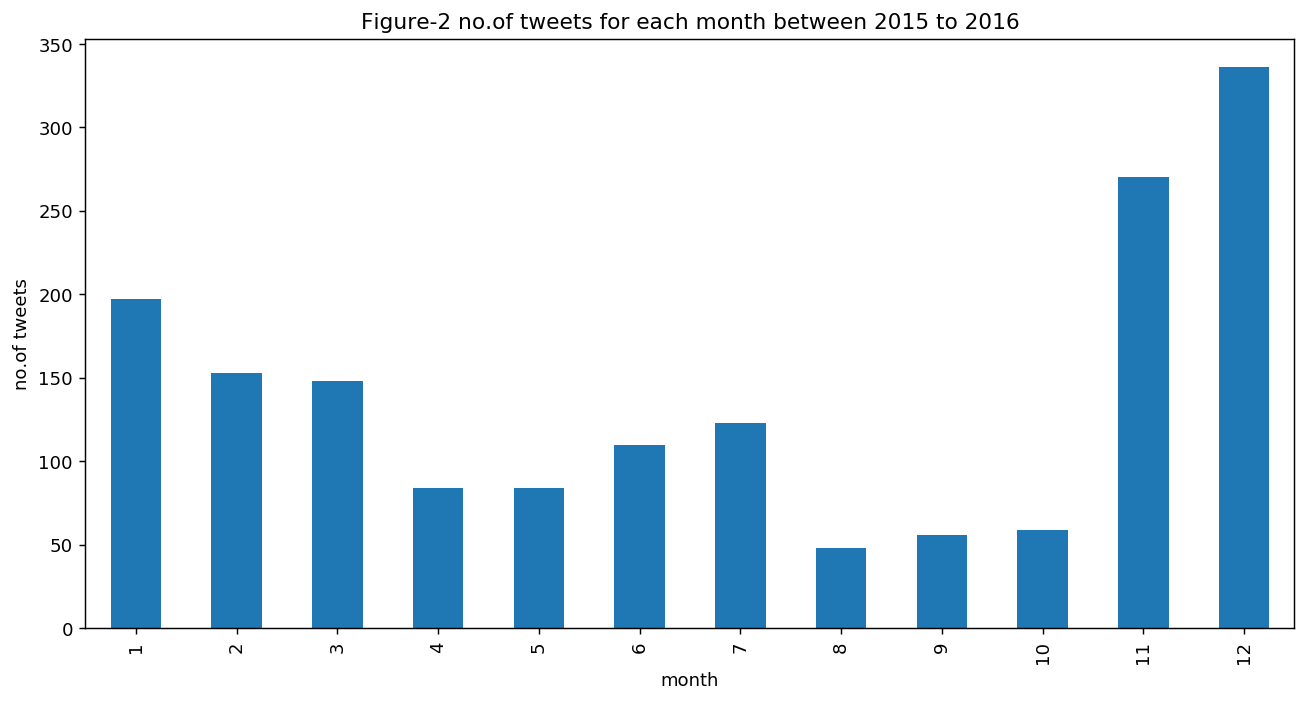

In [359]:
# to plot bar-chart by number of tweets by months 

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x-axis label
plt.xlabel('month')
# y-axis label
plt.ylabel('no.of tweets')
#title of the line plot
plt.title('Figure-2 no.of tweets for each month between 2015 to 2016')

#plotting the graph
no_of_tweets_grouped_by_month.plot(kind = 'bar');


### 4.2.2 Discussion. 
note: this the sum for all years .

the month with most no. tweets is December with 336 tweets .
the month with least no. tweets is August with 48 tweets

* important note
If we didn't remove all the unusable rows this may differ greatly.

### 4.3 What kinds of properties are associated with tweets that have high favorite_count?¶


In [365]:
df_master.favorite_count.describe()

count      1668.000000
mean       9265.497602
std       12629.516407
min          81.000000
25%        2153.500000
50%        4448.500000
75%       11695.750000
max      132810.000000
Name: favorite_count, dtype: float64

In [366]:
# select tweets with favorite_count greater than 11695.75.

high_favorite_tweets = df_master[df_master['favorite_count']>11695.75]

### 4.3.1 what is the number of tweets with high favorite_count  ?¶


In [378]:
high_favorite_tweets.tweet_id.count()

417

### 4.3.2 what is the most favorited stage ?¶


In [379]:
high_favorite_tweets.stage.value_counts()

                343
pupper           30
doggo            27
puppo            10
floofer           3
doggopupper       2
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

### 4.3.3 what is the median of retweet_count of high_favorite_tweets ?¶


In [380]:
high_favorite_tweets.retweet_count.median()

5312.0

### 4.3.4 Does high retweet_count receive better favorite_counts ?¶


In [381]:
# select movie with retweet less than the median

low_retweet = high_favorite_tweets.query(' retweet_count  < 5312.0')

# select movie with retweet greater than or equal to the median

high_retweet = high_favorite_tweets.query(' retweet_count  >= 5312.0')

# ensure these queries included each movie exactly once
num_samples = high_favorite_tweets.shape[0]
num_samples == low_retweet['retweet_count'].count() + high_retweet['retweet_count'].count() # should be True

True

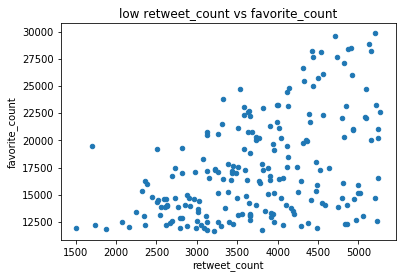

In [382]:
# to plot scatter-chart between low retweet_count & favorite_counts of high favorite_counts tweets


low_retweet.plot(x="retweet_count", y="favorite_count",title = 'low retweet_count vs favorite_count' ,  kind="scatter");

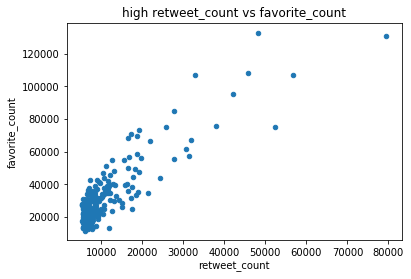

In [383]:
# to plot scatter-chart between high retweet_count & favorite_counts of high favorite_counts tweets


high_retweet.plot(x="retweet_count", y="favorite_count",title = 'high retweet_count vs favorite_count' ,  kind="scatter");

### 4.3 Discussion. 
 the number of tweets with high favorite_count  417
 the most favorited stage is pupper
 the median of retweet_count of high favorite_count tweets is 5312.0
 
 yes ; it is clear that as favorite_count increase retweet_count also increase.


<a id='conclusions'></a>

## conclusions
This was a very excitting data wrangleing & analysis. I came out with some entertaining facts about dogs . 

to conclude this analysis we can state the following:

* Tweets at WeRateDogs  has decresed over time.
* As favorite_count increase retweet_count also increase.
* Many names are missing from the data. 
* Although they say rating_denominator is always 10 , is not .
* Rating_numerator not always greater than 10 , and sometimes its huge such as 1776 
* text shows that some rating are for a group of dogs not one.


#### Limitations:
lost data with a lot of NaNs due to retweets , wrong enters. 
data is clearly not up to date since it is showing only up to 2017 ( analysis was done 2020 ).So there should be some updates.


### References :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.islower.html?highlight=islower#pandas.Series.str.islower
    

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html